In [6]:
from IGA import IGA2D
import IGA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
knot_vector1 = [0, 0, 1, 2, 3, 3]
knot_vector2 = [0, 0, 1, 2, 2]

control_points = np.array([[[3,0],[2,0],[1,0],[0,0]],[[3,1],[2,1],[1,1],[0,0]],[[3,2],[2,2],[1,2],[0,2]]])

weights = np.ones_like(control_points[:,:,0]).T

iga = IGA2D(knot_vector1, 1, knot_vector2, 1, control_points, weights)
iga.connectivity_array

array([[ 5,  4,  1,  0],
       [ 6,  5,  2,  1],
       [ 7,  6,  3,  2],
       [ 9,  8,  5,  4],
       [10,  9,  6,  5],
       [11, 10,  7,  6]])

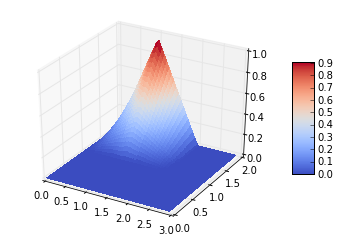

In [8]:
from IPython.html.widgets import interact, fixed

interact(iga.R.plot, shape_function_number={str(i):i for i in range(iga.num_of_global_basis_functions)}, derivative=fixed(None));

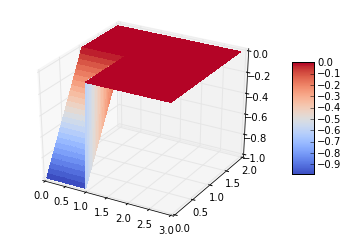

In [9]:
interact(iga.R.plot, shape_function_number={str(i):i for i in range(iga.num_of_global_basis_functions)}, derivative=['xi','eta']);

In [10]:
iga.R.N.knot_vector[np.array([1, 1, 1, 2, 2, 2], dtype=np.int) + 1] - iga.R.N.knot_vector[np.array([1, 1, 1, 2, 2, 2])]

array([1, 1, 1, 1, 1, 1])

In [11]:
iga.K

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
#Create a boundary condition node set and vaules for the top side
ns1 = np.array([8, 9, 10, 11], dtype=np.int64)
val1 = np.cos(np.pi * np.array([0., 1., 2., 3.]) / 6.) * 100

#Create a boundary condition node set for the right side
ns2 = np.array([3, 7, 11], dtype=np.int64)
val2 = np.zeros(len(ns2))

#Assemble
iga.assemble()
#Apply boundary conditions
iga.apply_bcs(ns1,val1)
iga.apply_bcs(ns2,val2)
#Solve
u = problem.solve()

[[ 0.21132487 -0.21132487 -0.78867513  0.          0.78867513  0.        ]
 [ 0.78867513 -0.78867513 -0.21132487  0.          0.21132487  0.        ]
 [ 0.21132487 -0.21132487 -0.78867513  0.          0.78867513  0.        ]
 [ 0.78867513 -0.78867513 -0.21132487  0.          0.21132487  0.        ]]


IGA.py:367: RuntimeWarning: divide by zero encountered in divide
  Jinv11 =  J22 / detJ
IGA.py:368: RuntimeWarning: divide by zero encountered in divide
  Jinv12 = -J12 / detJ
IGA.py:369: RuntimeWarning: divide by zero encountered in divide
  Jinv21 = -J21 / detJ
IGA.py:370: RuntimeWarning: divide by zero encountered in divide
  Jinv22 =  J11 / detJ


ValueError: operands could not be broadcast together with shapes (4,6) (4,) 